In [1]:
%pip install sklearn
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split # Import train_test_split function
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("DeathGripsDataset.csv", usecols=["danceability", "energy", "key",
       "loudness", "speechiness", "acousticness", "instrumentalness",
       "valence", "tempo", "Labels"])
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      99 non-null     float64
 1   energy            99 non-null     float64
 2   key               99 non-null     int64  
 3   loudness          99 non-null     float64
 4   speechiness       99 non-null     float64
 5   acousticness      99 non-null     float64
 6   instrumentalness  99 non-null     float64
 7   valence           99 non-null     float64
 8   tempo             99 non-null     float64
 9   Labels            99 non-null     int64  
dtypes: float64(8), int64(2)
memory usage: 7.9 KB


danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
valence             0
tempo               0
Labels              0
dtype: int64

In [3]:
X = df[["danceability", "energy", "key",
       "loudness", "speechiness", "acousticness", "instrumentalness",
       "valence", "tempo"]]
Y = df.Labels
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # 70% training and 30% test

In [4]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.auc(fpr, tpr))
print(confusion_matrix(y_test, y_pred))

0.65
0.6111111111111112
[[11  0]
 [ 7  2]]


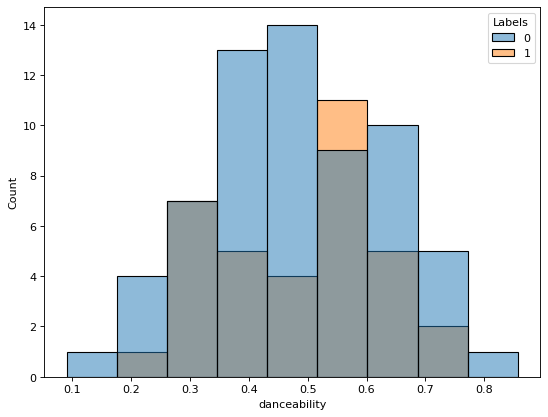

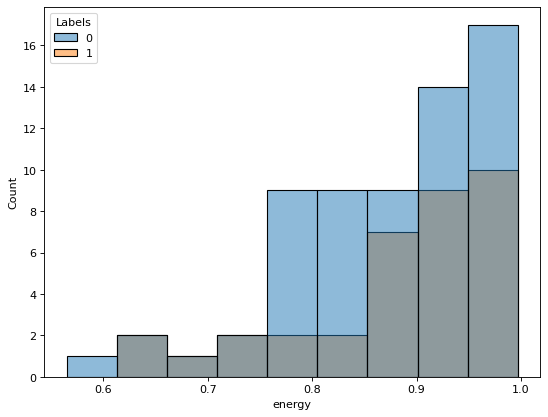

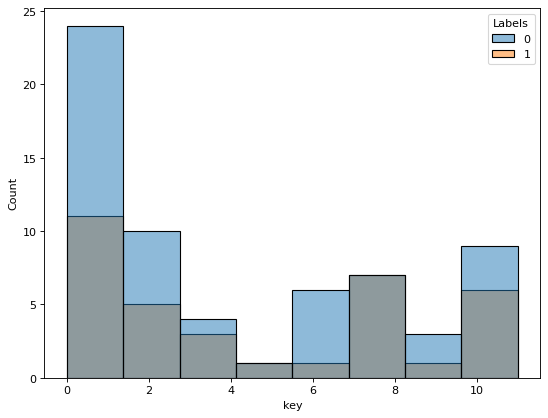

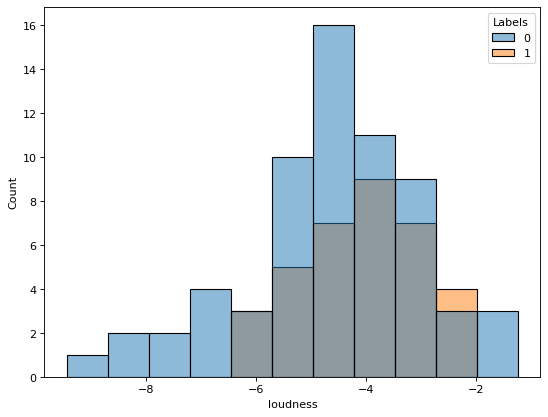

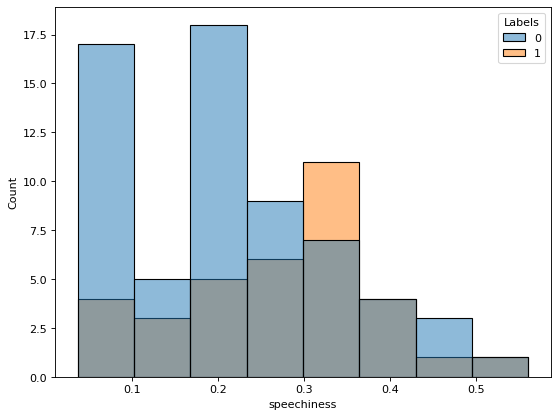

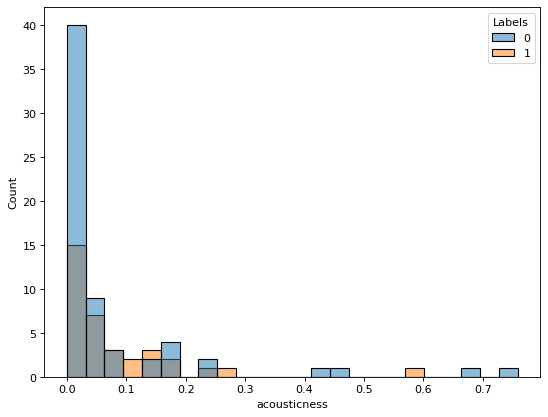

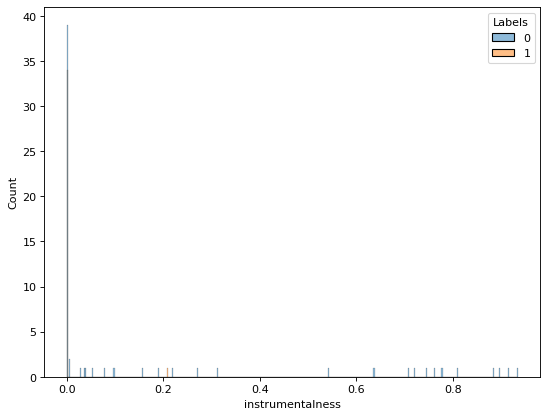

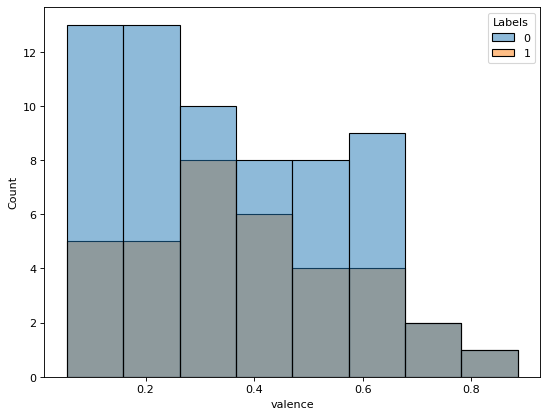

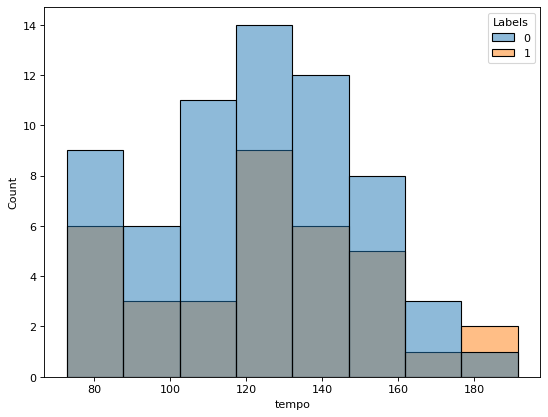

In [25]:
for i in df.columns[:-1]:
    fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    ax.set_title(str(i) + " Confusion Matrix:")
    ax.set_xlabel(["FB Present","FB Not Present"])
    ax.set_ylabel(["Predicted True ","Predicted False"])
    plt.clf()
    # ax = fig.add_subplot(111)
    ax.set_aspect(1)
    sns.histplot(data = df, x = i, hue=df.Labels)